<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
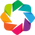

In [267]:
import holoviews as hv
import numpy as np
hv.extension('bokeh')

In [268]:
# identity matrix

n = 20
unit_matrix = np.identity(n)
hv_matrix = hv.Image(unit_matrix)
hv_matrix

:Image   [x,y]   (z)

In [269]:
np.repeat(2,n-1)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [270]:
# banded matrix

n = 20
value_diag = 1
band_a = 2

# create banded matrix

def band_matrix_fct(n,value_diag,band_a):
    band_matrix = np.zeros((n,n))
    band_matrix[np.arange(n-1), np.arange(n-1)+1] = np.repeat(band_a,n-1)
    band_matrix[np.arange(n), np.arange(n)] = np.repeat(value_diag,n)
    band_matrix[np.arange(n), np.arange(n)-1] = np.repeat(band_a,n)
    band_matrix[n-1,0] = band_a
    return band_matrix

hv_band_matrix = hv.Image(band_matrix_fct(n,value_diag,band_a))
hv_band_matrix

:Image   [x,y]   (z)

In [271]:
# banded block matrix

n = 10
value_diag = 4
band_a = -1
band_block_matrix = np.zeros((n**2,n**2))
for i in range(n):
    band_block_matrix[i*n:(i+1)*n,i*n:(i+1)*n] = band_matrix_fct(n,value_diag,band_a)
    
for i in range(n-1): 
    #print(((i+1)*n,(i+2)*n))
    band_block_matrix[(i+1)*n:(i+2)*n,i*n:(i+1)*n] = -np.identity(n)
    band_block_matrix[i*n:(i+1)*n,(i+1)*n:(i+2)*n] = -np.identity(n)
    
hv_band_block_matrix = hv.Image(band_block_matrix)
hv_band_block_matrix    

:Image   [x,y]   (z)

In [272]:
# correlation matrix

corr_band_block_matrix = np.corrcoef(band_block_matrix)
hv_corr_band_block_matrix = hv.Image(corr_band_block_matrix)
hv_corr_band_block_matrix 

:Image   [x,y]   (z)

In [273]:
# upper and lower triangular matrix

n = 50
matrix = np.random.random((n,n))
matrix_tril = np.tril(matrix)
matrix_triu = np.triu(matrix)
hv_matrix_tril = hv.Image(matrix_tril)
hv_matrix_triu = hv.Image(matrix_triu)
hv_matrix_tril + hv_matrix_triu


:Layout
   .Image.I  :Image   [x,y]   (z)
   .Image.II :Image   [x,y]   (z)

In [274]:
# symmetric matrix

n = 20
matrix = np.random.random((n,n))
matrix_tril = np.tril(matrix,-1)
matrix_triu = np.matrix.transpose(matrix_tril)

matrix_sym = matrix_tril + matrix_triu
hv_matrix_sym = hv.Image(matrix_sym)
hv_matrix_sym 

:Image   [x,y]   (z)

In [275]:
# VINE METHOD to generate random correlation matrices
# Algo obtained here (and adapted to Python) : https://stats.stackexchange.com/questions/2746/how-to-efficiently-generate-random-positive-semidefinite-correlation-matrices
def vine_corr(d, eta):
    beta = eta + (d-1)/2   
    P = np.zeros((d,d))           # storing partial correlations
    S = np.identity(d)

    for k in range(d-1):
        beta = beta - 1/2
        for i in np.arange(k+1,d):
            P[k,i] = np.random.beta(beta,beta) # sampling from beta
            P[k,i] = (P[k,i]-0.5)*2     # linearly shifting to [-1, 1]
            p = P[k,i];
            for l in np.arange(k-1,-1):  # converting partial correlation to raw correlation
                p = p * np.sqrt((1-P[l,i]**2)*(1-P[l,k]**2)) + P[l,i]*P[l,k]
            S[k,i] = p
            S[i,k] = p
    return S


In [276]:
# generate correlation matrix

n = 100

corr_matrix1 = vine_corr(n,0.1)
corr_matrix2 = vine_corr(n,10)
corr_matrix3 = vine_corr(n,100)
hv_corr_matrix1 = hv.Image(corr_matrix1)
hv_corr_matrix2 = hv.Image(corr_matrix2)
hv_corr_matrix3 = hv.Image(corr_matrix3)
hv_corr_matrix1 + hv_corr_matrix2 + hv_corr_matrix3

:Layout
   .Image.I   :Image   [x,y]   (z)
   .Image.II  :Image   [x,y]   (z)
   .Image.III :Image   [x,y]   (z)

In [277]:
# Not sure what happens in the bottom right corner...

In [278]:
np.linalg.eig(corr_matrix1)

(array([ 4.55173546, -2.24240145, -1.91999911, -1.77034643,  3.87526768,
        -1.53515906,  3.6223875 ,  3.51853252,  3.38640687, -1.34957687,
         3.23554989,  3.1662071 , -1.21622084, -1.17483642,  3.06523067,
        -1.08222872,  2.97020407,  2.91291427, -0.91656129,  2.85221416,
        -0.93548629, -0.85767194, -0.80652627,  2.72954822,  2.71769571,
         2.63476563,  2.57221397, -0.73289533, -0.65773427, -0.59023215,
        -0.63103697, -0.49468507, -0.52445822,  2.48032319,  2.44642371,
         2.39322387, -0.36980537, -0.343405  , -0.28341383,  2.32432316,
        -0.22272314, -0.18736943, -0.10849188,  2.26014948,  2.20379079,
         2.18696153,  2.16498779, -0.03923478,  2.09605522, -0.00656849,
         0.0271432 ,  2.03649306,  2.01220377,  0.07870626,  0.12106416,
         0.20008189,  1.94203708,  1.91772043,  1.89680774,  0.21529033,
         0.25946178,  0.29111499,  1.80291503,  1.7879132 ,  1.77355081,
         1.72328344,  0.35062945,  1.67925096,  1.6

***

somehow this is not positive definite (as the author of the algo implied... or I translated it incorrectly?)

***

In [279]:
# VINE METHOD to generate random correlation matrices with permutations
# Algo obtained here (and adapted to Python) : https://stats.stackexchange.com/questions/2746/how-to-efficiently-generate-random-positive-semidefinite-correlation-matrices
def vine_corr_perm(d, eta):
    beta = eta + (d-1)/2   
    P = np.zeros((d,d))           # storing partial correlations
    S = np.identity(d)

    for k in range(d-1):
        beta = beta - 1/2
        for i in np.arange(k+1,d):
            P[k,i] = np.random.beta(beta,beta) # sampling from beta
            P[k,i] = (P[k,i]-0.5)*2     # linearly shifting to [-1, 1]
            p = P[k,i];
            for l in np.arange(k-1,-1):  # converting partial correlation to raw correlation
                p = p * np.sqrt((1-P[l,i]**2)*(1-P[l,k]**2)) + P[l,i]*P[l,k]
            S[k,i] = p
            S[i,k] = p
            
    permutation = np.random.permutation(d)
    S = S[permutation,:]
    S = S[:,permutation]        
    return S 


In [280]:
# generate correlation matrix with random permutations

n = 100

corr_matrix1 = vine_corr_perm(n,0.1)
corr_matrix2 = vine_corr_perm(n,10)
corr_matrix3 = vine_corr_perm(n,100)
hv_corr_matrix1 = hv.Image(corr_matrix1)
hv_corr_matrix2 = hv.Image(corr_matrix2)
hv_corr_matrix3 = hv.Image(corr_matrix3)
hv_corr_matrix1 + hv_corr_matrix2 + hv_corr_matrix3

:Layout
   .Image.I   :Image   [x,y]   (z)
   .Image.II  :Image   [x,y]   (z)
   .Image.III :Image   [x,y]   (z)

In [281]:
# generate correlation matrix from multivariate normal random variables

def factor(d,k):
    W = np.random.multivariate_normal(mean = np.zeros(d), cov = np.identity(d), size = k)
    S = np.matmul(np.matrix.transpose(W),W) + np.diag(np.random.uniform(size = d))
    D = np.diag(1.0/np.sqrt(np.diag(S)))
    S = np.linalg.multi_dot([D,S,D])
    return S

In [282]:
# generate correlation matrix from above algo

n = 20

corr_matrix1 = factor(n,k=1)
corr_matrix2 = factor(n,k=4)
corr_matrix3 = factor(n,k=10)
hv_corr_matrix1 = hv.Image(corr_matrix1)
hv_corr_matrix2 = hv.Image(corr_matrix2)
hv_corr_matrix3 = hv.Image(corr_matrix3)
hv_corr_matrix1 + hv_corr_matrix2 + hv_corr_matrix3

:Layout
   .Image.I   :Image   [x,y]   (z)
   .Image.II  :Image   [x,y]   (z)
   .Image.III :Image   [x,y]   (z)

In [319]:
np.linalg.eig(corr_matrix1)[0]

array([ 2.91901816,  1.32464837,  0.14390964,  0.06881546,  0.54360837])

In [513]:
# construct a matrix for Gauss algorithm
# step 1: correlation matrix

np.random.seed(3)

n = 10
corr_matrix1 = factor(n,k=10)
hv_corr_matrix1 = hv.Image(corr_matrix1)
hv_corr_matrix1

:Image   [x,y]   (z)

In [514]:
print(np.linalg.det(corr_matrix1))
print('\n')
print(np.linalg.eig(corr_matrix1)[0])


0.00191449124054


[ 2.45817381  2.16229489  1.73456601  1.42086063  0.76068545  0.68101208
  0.37180546  0.31011544  0.0414312   0.05905505]


In [515]:
# step two: multiply with a diagonal matrix

np.random.seed(1)
M_diag_vector = np.random.uniform(0.5,3,size = n)
M_diag = np.diag(M_diag_vector)
M = np.linalg.multi_dot([M_diag,corr_matrix1,M_diag])

print(M)
print('\n')
print(np.linalg.det(M))
print('\n')
print(np.linalg.eig(M)[0])



[[ 2.37947596  0.47035286 -0.15850732 -0.15984036  0.21533292 -0.30020835
   0.10449804 -0.20226009  1.26713958 -0.01318921]
 [ 0.47035286  5.29373233 -0.12782638  0.60369771 -0.19413149 -0.9072459
  -0.6759836  -1.88000892  0.01236277 -0.23328187]
 [-0.15850732 -0.12782638  0.25028602  0.14290684  0.13322547  0.04872672
   0.17191176 -0.14455971 -0.17211769 -0.50158279]
 [-0.15984036  0.60369771  0.14290684  1.57711258  0.31150104  0.10215824
   0.57493013 -0.48170483  0.46656913  0.62932546]
 [ 0.21533292 -0.19413149  0.13322547  0.31150104  0.7514978   0.16154755
   0.30289363 -0.07645573 -0.10426321 -0.70479169]
 [-0.30020835 -0.9072459   0.04872672  0.10215824  0.16154755  0.53413659
   0.21704709  0.43064481 -0.37213929  0.33097048]
 [ 0.10449804 -0.6759836   0.17191176  0.57493013  0.30289363  0.21704709
   0.93248094 -0.08355101 -0.25421029  0.40876038]
 [-0.20226009 -1.88000892 -0.14455971 -0.48170483 -0.07645573  0.43064481
  -0.08355101  1.86022817  0.07919342  0.55191813]
 

In [516]:
# Gauss algorithm without pivot
hv_gauss = []

A_k = M # initialize
L_k = M_k = np.identity(n)
hv_gauss.append(hv.Image(M_k) + hv.Image(A_k) + hv.Image(L_k))

for k in range(n-1):
    l_k = np.concatenate([np.zeros(k+1),np.squeeze(np.asarray(A_k[k+1:,k]/A_k[k,k])).reshape(n-k-1,)]) # matrix vs array vs single point... really?
    M_k = np.identity(n) - np.matmul(np.transpose(np.matrix(l_k)),np.eye(1,n,k))
    M_k_minus = np.identity(n) + np.matmul(np.transpose(np.matrix(l_k)),np.eye(1,n,k))  # inverse of M_k
    A_k = np.matmul(M_k,A_k)
    L_k = np.matmul(L_k,M_k_minus)
    hv_gauss.append(hv.Image(M_k) + hv.Image(A_k) + hv.Image(L_k))
    #print(M_k)
    #print('\n')
    #print(A_k)
    #print('\n')
    #print(L_k)
    #print('\n')


dict_gauss = {int(k): hv_gauss[k] for k in range(n)}

In [517]:
hv.HoloMap(dict_gauss)

:HoloMap   [Default]
   :Layout
      .Image.I   :Image   [x,y]   (z)
      .Image.II  :Image   [x,y]   (z)
      .Image.III :Image   [x,y]   (z)